<a href="https://colab.research.google.com/github/doissegundos/Netflix_Movies_and_TV_Shows/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploração

#### TV Shows and Movies listed on Netflix
Este trabalho faz uma análise do dataset "TV Shows and Movies listed on Netflix", afim de entender e visualizar os dados presentes nele. Algumas das questões analisadas foram: 
- Paises com mais de 100 filmes disponiveis
- Diretores que produziram mais de 7 filmes
- Comparação entre o número de Movies e TV Shows produzidos
- Estilos de conteúdos produzidos
- Relação da produção de filmes a partir da década de 90. 
}

Acesso em: https://www.kaggle.com/shivamb/netflix-shows

In [76]:
from google.colab import drive
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
#Para os arquivos do Drive
drive.mount('/content/drive')
df = pd.read_csv(r'drive/My Drive/datasets/netflix_titles.csv')

Mounted at /content/drive


In [3]:
print('Quantidade de instâncias: {}\nQuantidade de atributos: {}\n'.format(len(df), len(df.columns)))
df[0:20]

Quantidade de instâncias: 6234
Quantidade de atributos: 12



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


## Visualização

### Exibe os paises com mais de 100 filmes disponiveis

In [122]:
df["country"][0:9]

0    United States, India, South Korea, China
1                              United Kingdom
2                               United States
3                               United States
4                               United States
5                                       Spain
6      Bulgaria, United States, Spain, Canada
7                                       Chile
8                               United States
Name: country, dtype: object

Como é percepitivel, em algumas instancias contém varios paises, logo é interessante fazer um splite de cada instancia, separando os nomes dos paises

In [123]:
df["country"] = df["country"].astype('str') #converte as instancias para o tipo str
data = df["country"]
# Cria um Data Frame
df_paises = pd.DataFrame(columns={'paises'})

# Dividir cada amostras a partir do separador ','
for i in data:
  aux = i.split(', ')
  for j in aux:
    df_paises = df_paises.append({'paises':j}, ignore_index=True)

In [124]:
#Relaciona os paises de acordo com a quantidade de seus filmes
data = df_paises['paises'].value_counts().to_frame().reset_index()
#renomeia as colunas
data.columns = ["paises", "quantidade"]

In [125]:
#Apaga os filmes que não tem paises disponiveis definidos
data = data.query("paises != 'nan'")

In [126]:
#Seleciona os paises que contém mais de 100 filmes disponiveis
data = data.query("quantidade>100")

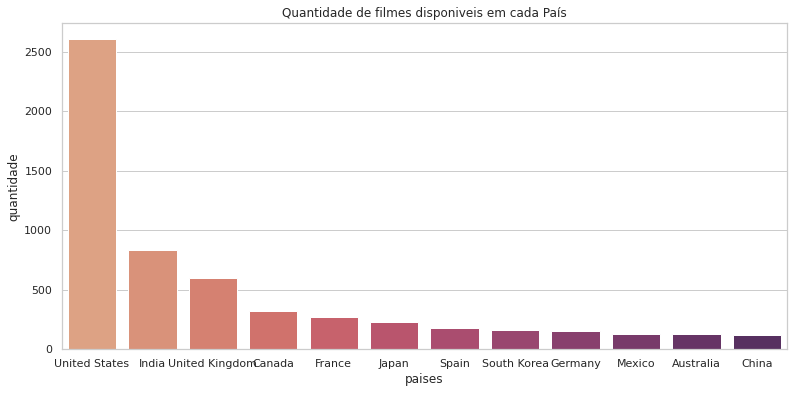

In [127]:
#Faz o plot do grafico
plt.figure(figsize=(13, 6))
sns.set_theme(style="whitegrid")
sns.barplot(x = 'paises', y ="quantidade" ,data=data,palette="flare")
plt.title('Quantidade de filmes disponiveis em cada País') 
plt.show()

### Exibe os diretores que produziram mais de 7 filmes

In [128]:
df["director"][0:9]

0           Richard Finn, Tim Maltby
1                                NaN
2                                NaN
3                                NaN
4                   Fernando Lebrija
5                                NaN
6                        Gabe Ibáñez
7    Rodrigo Toro, Francisco Schultz
8                                NaN
Name: director, dtype: object

Como é percepitivel, em algumas instancias contém varios diretores por filme, logo é interessante fazer um splite de cada instancia, separando os nomes de diretores por filme

In [133]:
df["director"] = df["director"].astype('str') #converte as instancias para o tipo str
data = df["director"]
# Cria um Data Frame
df_paises = pd.DataFrame(columns={'diretores'})

# Dividir cada amostras a partir do separador ','
for i in data:
  aux = i.split(', ')
  for j in aux:
    df_paises = df_paises.append({'diretores':j}, ignore_index=True)

In [134]:
#Relaciona os diretores de acordo com a quantidade de seus filmes
data = df_paises['diretores'].value_counts().to_frame().reset_index()
#renomeia as colunas
data.columns = ["diretores", "quantidade"]

In [135]:
#Apaga os filmes que não tem os nomes de diretores definidos
data = data.query("diretores != 'nan'")

In [139]:
#Seleciona os diretores que contém mais de 7 filmes 
data = data.query("quantidade>7")

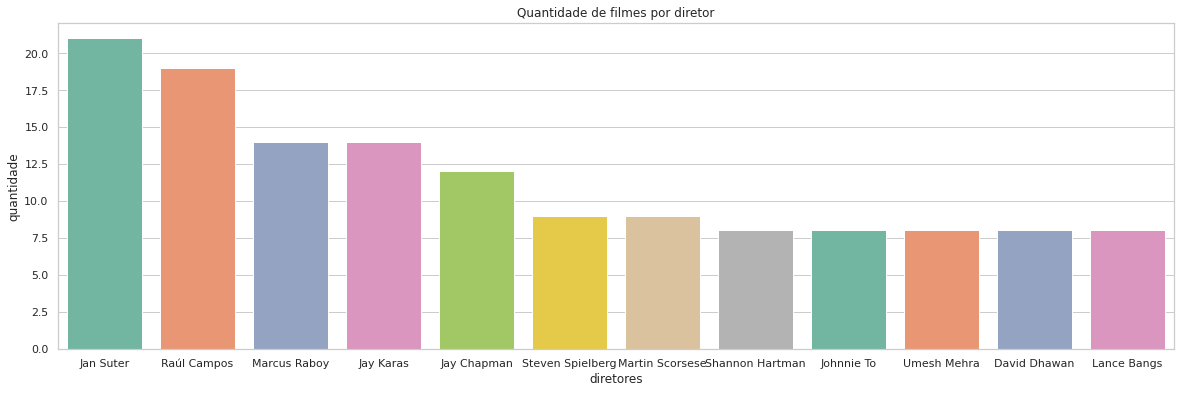

In [144]:
#Faz o plot do grafico
plt.figure(figsize=(20, 6))
sns.set_theme(style="whitegrid")
sns.barplot(x = 'diretores', y ="quantidade" ,data=data,palette="Set2")
plt.title('Quantidade de filmes por diretor') 
plt.show()

### Exibe a comparação entre o numero de movies e de TV Shows produzidos

O dataset contém dois tipos de conteudos produzidos, que são os movies e o TV show, logo será exibido a comparação entre os tipos de conteudos produzidos.

In [145]:
df["type"][0:9]

0      Movie
1      Movie
2    TV Show
3    TV Show
4      Movie
5    TV Show
6      Movie
7      Movie
8    TV Show
Name: type, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


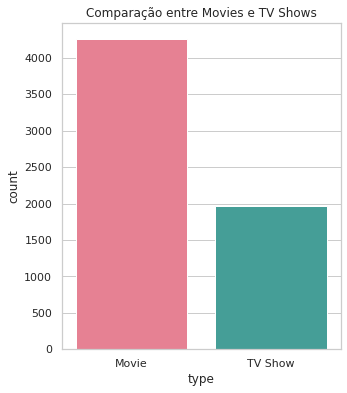

In [150]:
plt.figure(figsize=(5, 6))
sns.set_theme(style="whitegrid")
data = df['type'].to_frame().reset_index()
data.columns = ["index", "type"]
sns.countplot('type',data=data,palette="husl")
plt.title('Comparação entre Movies e TV Shows') 
plt.show()

### Exibe o Estilo de conteudo com menos de um total de obras relacionadas

In [32]:
data = df["listed_in"]

In [33]:
data[0:7]

0                   Children & Family Movies, Comedies
1                                      Stand-Up Comedy
2                                             Kids' TV
3                                             Kids' TV
4                                             Comedies
5    Crime TV Shows, International TV Shows, Spanis...
6    International Movies, Sci-Fi & Fantasy, Thrillers
Name: listed_in, dtype: object

Como é percepitivel, em algumas instancias contém varios estilos de filmes, logo é interessante fazer um splite de cada instancia, separando os nomes dos estilos

In [34]:
df["listed_in"] = df["listed_in"].astype('str') #converte as instancias para o tipo str
data = df["listed_in"]
# Cria um Data Frame
df_paises = pd.DataFrame(columns={'tipo'})

# Dividir cada amostras a partir do separador ','
for i in data:
  aux = i.split(', ')
  for j in aux:
    df_paises = df_paises.append({'tipo':j}, ignore_index=True)

In [35]:
#Relaciona os tipos de acordo com a quantidade de seus filmes
data = df_paises['tipo'].value_counts().to_frame().reset_index()
#renomeia as colunas
data.columns = ["tipo", "quantidade"]

In [36]:
#Apaga os filmes que não tem os nomes de diretores definidos
data = data.query("tipo != 'nan'")

In [37]:
#Seleciona os diretores que contém mais de 7 filmes 
data1 = data.query("quantidade>400")

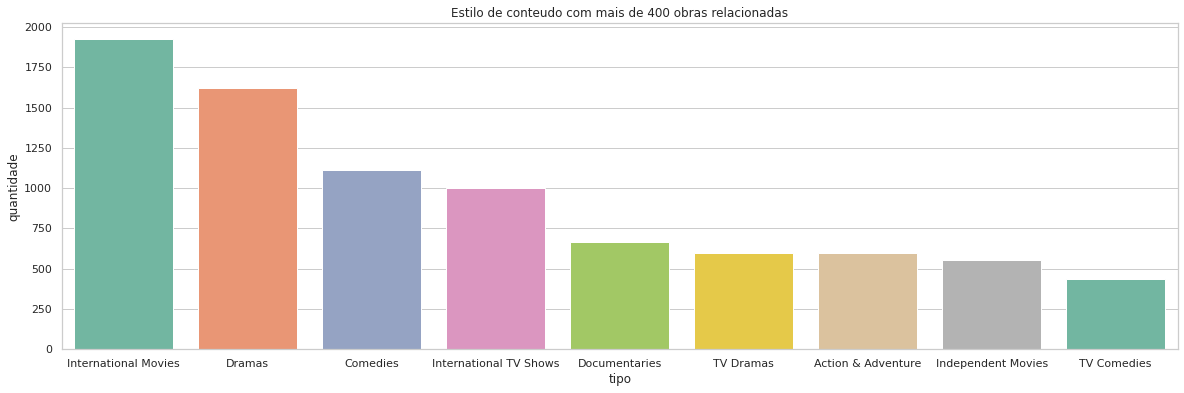

In [38]:
#Faz o plot do grafico
plt.figure(figsize=(20, 6))
sns.set_theme(style="whitegrid")
sns.barplot(x = 'tipo', y ="quantidade" ,data=data1,palette="Set2")
plt.title("Estilo de conteudo com mais de 400 obras relacionadas") 
plt.show()

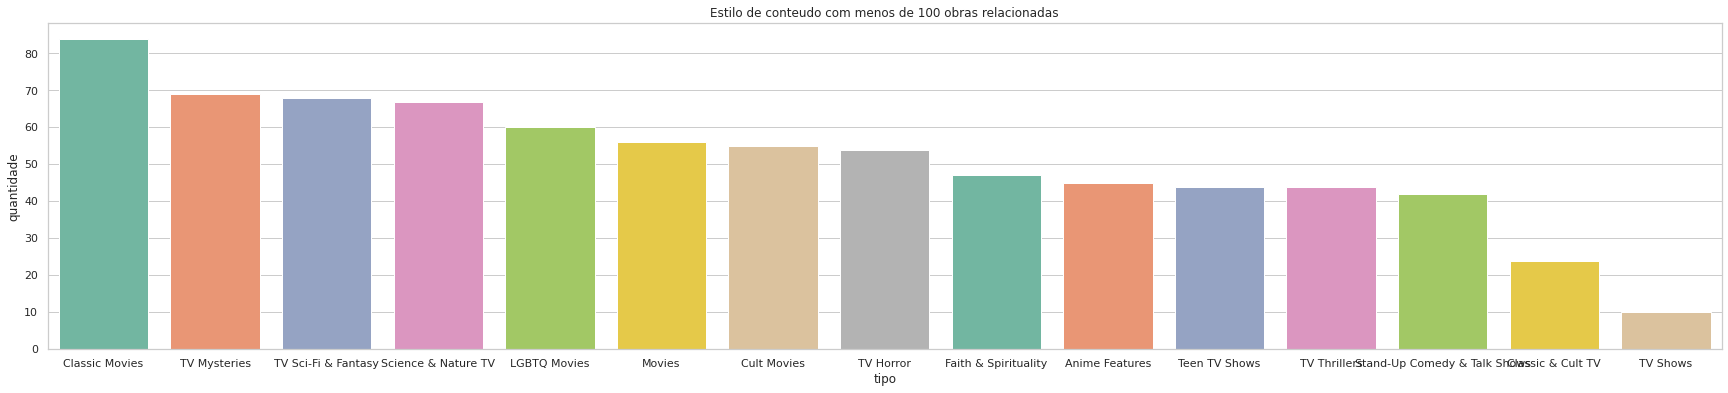

In [39]:
#Seleciona os diretores que contém mais de 7 filmes 
data2 = data.query("quantidade<100")
#Faz o plot do grafico
plt.figure(figsize=(30, 6))
sns.set_theme(style="whitegrid")
sns.barplot(x = 'tipo', y ="quantidade" ,data=data2,palette="Set2")
plt.title("Estilo de conteudo com menos de 100 obras relacionadas") 
plt.show()

### Relação da produção de filme a partir da decada de 90

In [78]:
data = df["release_year"]

In [79]:
data[0:7]

0    2019
1    2016
2    2013
3    2016
4    2017
5    2016
6    2014
Name: release_year, dtype: int64

In [80]:
#Relaciona os tipos de acordo com a quantidade de seus filmes
data = data.value_counts().to_frame().reset_index()
#renomeia as colunas
data.columns = ["ano", "quantidade"]
#data = data.query("ano>1990")

In [81]:
data = data.query("ano>1990")

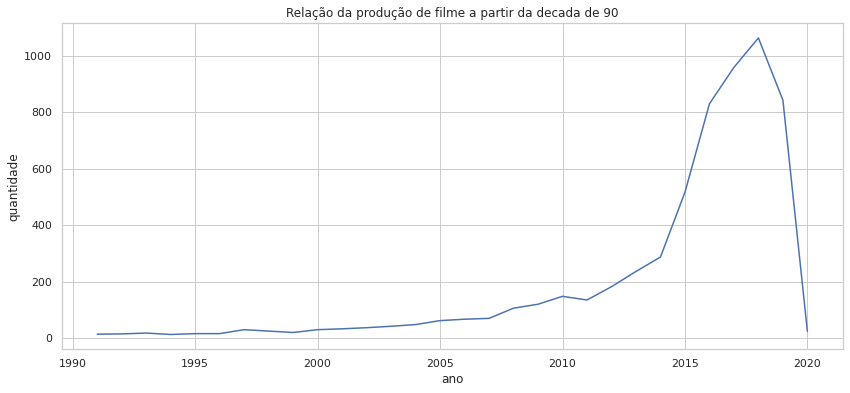

In [82]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.lineplot(x="ano", y="quantidade", data = data,palette="flare")
plt.title('Relação da produção de filme a partir da decada de 90') 
plt.show()